In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('/gstore/project/hr_brca_heterogeneity/T47D_trace_Seq_v2/Nathan/mse')
#os.listdir()

In [2]:
import pandas as pd

mse_file = open('mse_dict_trans_9545_plsrres0.3_HALL3_predictions.csv', 'r')
for line in mse_file:
    mse = eval(line)
mse

{'GFPBC_libB_92196': {0.25: [0.00662444209883965,
   0.26679530352804737,
   0.12196878926168625,
   0.418424543940992,
   0.055153427376323075,
   0.22395891247837268,
   0.005543053644046952,
   0.2949536218193916,
   [[-0.48787978291511536],
    [-0.4350501596927643],
    [-0.4252895414829254],
    [-0.24680395424365997],
    [-0.12943480908870697],
    [0.20979535579681396],
    [0.2740558087825775],
    [0.017289167270064354],
    [-0.355282723903656],
    [-0.2852802574634552],
    [0.12554408609867096],
    [-0.030726389959454536],
    [0.09999778121709824],
    [0.0261563528329134],
    [-0.29910799860954285],
    [-0.23131819069385529],
    [0.25000670552253723],
    [0.17182116210460663],
    [-0.1385742872953415],
    [0.11137327551841736],
    [-0.15215595066547394],
    [0.06664885580539703],
    [-0.2658844292163849],
    [-0.350279301404953],
    [-0.3736492097377777],
    [-0.1685372143983841],
    [-0.1872497946023941],
    [-0.31614574790000916],
    [-0.3084994256496

In [62]:
def detransform(normvals, minsurv, maxsurv):
    
    denormvals = []
    for val in normvals:
        denormvals.append((val * (maxsurv - minsurv)) + minsurv)
    return denormvals

In [73]:
barcode = 'GFPBC_libB_20182'

In [74]:
os.chdir('/gstore/project/hr_brca_heterogeneity/T47D_trace_Seq_v2/Nathan/')
jfile = 'json_files/tran_9545_plsrres0.3_HALL3.json'

from sklearn.preprocessing import MinMaxScaler
import json
f = open(jfile)
data = json.load(f)
df = pd.DataFrame(data[barcode])
ptime = df['Pseudotime'].tolist()
print(len(ptime))


vs = [0.25, 0.5, 0.75, 1]
for splitval in vs:
    num_cell_day = len(df['RealTime'].tolist())
    snum = int(num_cell_day*splitval)
    bardf = df.iloc[:snum,:]
    presurv = bardf['Survival'].tolist()
    minsurv = min(presurv)
    maxsurv = max(presurv)
    print(minsurv, maxsurv)
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    newdf = pd.DataFrame(scaler.fit_transform(bardf.iloc[:,2:len(bardf.columns)-1]))
    newdf.columns = bardf.columns[2:len(bardf.columns)-1]
    postsurv = newdf['Survival'].tolist()
    
    denormsurv = detransform(postsurv, minsurv, maxsurv)
    print(presurv[0:3])
    print(postsurv[0:3])
    print(denormsurv[0:3])
    print(min(denormsurv), max(denormsurv))
    print()


2018
-0.2694 0.9495
[0.9495, 0.8847, 0.8547]
[0.9999999999999998, 0.8936746246615801, 0.844449913856756]
[0.9494999999999999, 0.8199000000000002, 0.7599000000000001]
-1.4883000000000002 0.9494999999999999

-0.3981 0.9495
[0.9495, 0.8847, 0.8547]
[1.0000000000000002, 0.9038290293855744, 0.859305431878896]
[0.9495000000000001, 0.8199, 0.7599000000000001]
-1.7456999999999998 0.9495000000000001

-0.7734 0.9495
[0.9495, 0.8847, 0.8547]
[0.9999999999999999, 0.9247779905972487, 0.8899529862441231]
[0.9494999999999999, 0.8199, 0.7598999999999999]
-2.4963 0.9494999999999999

-0.9126 0.9495
[0.9495, 0.8847, 0.8547]
[1.0000000000000002, 0.9304011599806673, 0.8981794747865316]
[0.9495000000000003, 0.8199000000000004, 0.7599000000000004]
-2.7746999999999997 0.9495000000000003



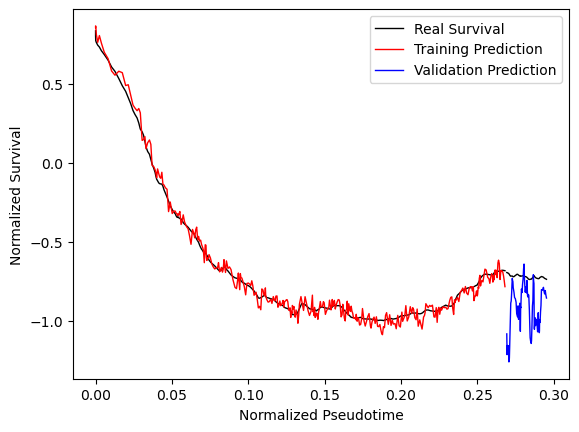

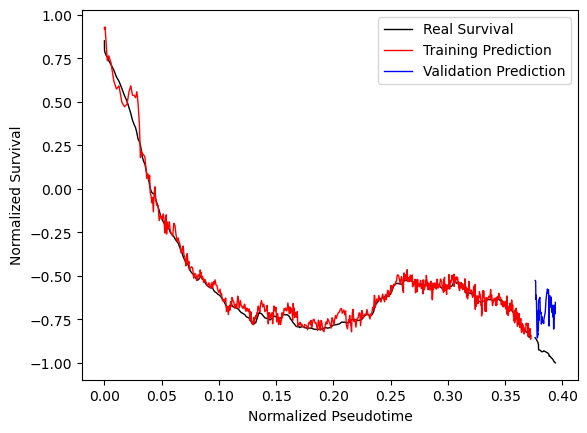

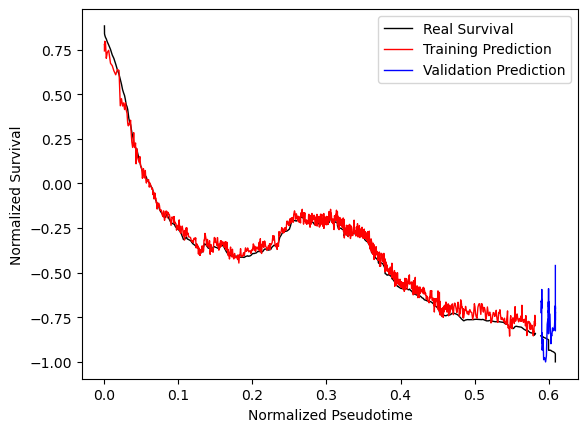

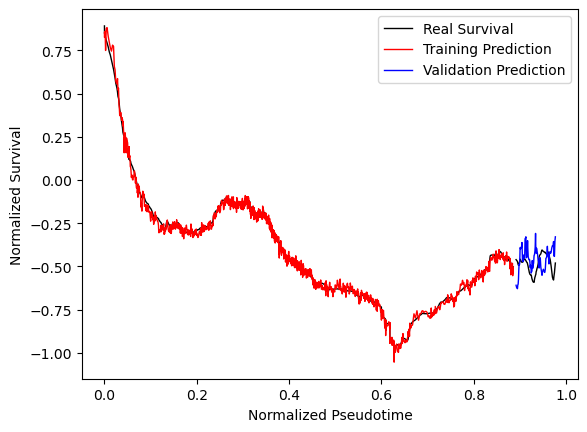

In [75]:
# mse dict has the structure {barcode: {0.25:[], ..., 1:[]}} with [] containing
# [0-TraCSED_train_mse, 1-TraCSED_val_mse, 2-regr_train_mse, 3-regr_val_mse, 4-noattn_train_mse, 5-noattn_val_mse, 6-noenc_train_mse, 7-noenc_val_mse, 8-TraCSED_train_pred.tolist(), 9-TraCSED_val_pred.tolist(), 10-real_y_train.tolist(), 11-real_y_val.tolist()]
bar = mse[barcode]
seqlen = 8
for k, vals in bar.items():
    train_pred = vals[8]
    val_pred = vals[9]
    train_real = vals[10]
    val_real = vals[11]
    
    plt.plot(ptime[:len(train_real)], train_real, linewidth=1, color='black', label='Real Survival')
    plt.plot(ptime[seqlen+len(train_real):seqlen+len(train_real)+len(val_real)], val_real, linewidth=1, color='black')
    plt.plot(ptime[:len(train_pred)], train_pred, linewidth=1, color='red', label='Training Prediction')
    plt.plot(ptime[seqlen+len(train_pred):seqlen+len(train_pred)+len(val_pred)], val_pred, linewidth=1, color='blue', label='Validation Prediction')
    plt.xlabel('Normalized Pseudotime')
    plt.ylabel('Normalized Survival')
    plt.legend(loc='best')
    plt.show()

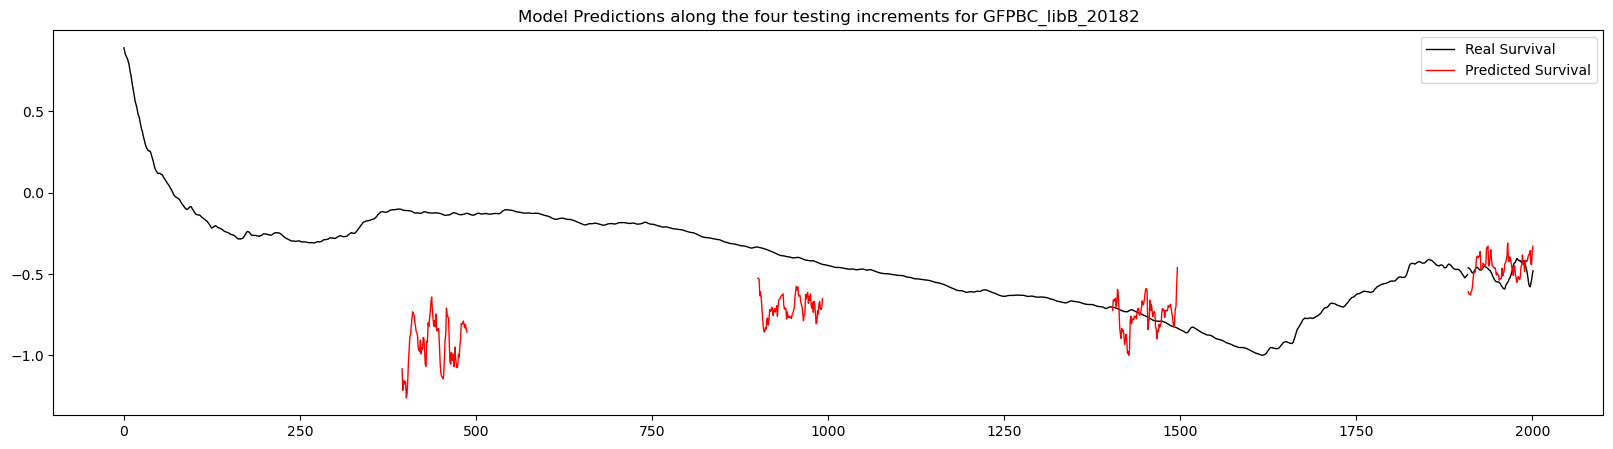

In [76]:
# not adjusted for min-max normalization process

train_real = bar[1][10]
val_real = bar[1][11]
pred025_val = bar[0.25][9]
pred05_val = bar[0.5][9]
pred075_val = bar[0.75][9]
pred1_val = bar[1][9]
pred025_train = bar[0.25][8]
pred05_train = bar[0.5][8]
pred075_train = bar[0.75][8]
pred1_train = bar[1][8]

plt.figure(figsize=(20,5))
plt.plot(range(len(train_real)), train_real, linewidth=1, color='black')
plt.plot(range(len(train_real), len(train_real)+len(val_real)), val_real, linewidth=1, color='black', label='Real Survival')
plt.plot(range(len(pred025_train), len(pred025_train)+len(pred025_val)), pred025_val, linewidth=1, color='red')
plt.plot(range(len(pred05_train), len(pred05_train)+len(pred05_val)), pred05_val, linewidth=1, color='red')
plt.plot(range(len(pred075_train), len(pred075_train)+len(pred075_val)), pred075_val, linewidth=1, color='red')
plt.plot(range(len(pred1_train), len(pred1_train)+len(pred1_val)), pred1_val, linewidth=1, color='red', label='Predicted Survival')

plt.legend(loc='best')
plt.title('Model Predictions along the four testing increments for '+barcode)
plt.show()